# CodeSoft : DataScience InternShip
# Task 05: Credit-Card_Fraud_Detection
# Author : Haroon Sajid

_________________

- Build a machine learning model to identify fraudulent credit card transactions.
- Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

## 1.0 Importing Libraries

Pandas: Data manipulation and analysis library.
<br>Numpy: Numerical computing library.
<br>Matplotlib: Data visualization library.
<br>Seaborn: Statistical data visualization library.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.0 Loading Dataset
In this section, We will import Credit-Card Dataset

In [41]:
df = pd.read_csv('creditcard.csv')
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.0 Basic Structure

In [42]:
# Lets check the shape of data
df.shape

(284807, 31)

In [43]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
# Lets See duplicate values in dataset
df.duplicated().sum()

1081

## 4.0 Descriptive Statistics

In [45]:
# Lets See the statistics summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 5.0  Identify Missing Values

In [46]:
# Lets See the missing values in dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 6.0 Data Exploration(EDA)

In [47]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [48]:
# Lets See unique values in 'Class' column
df['Class'].nunique()

2

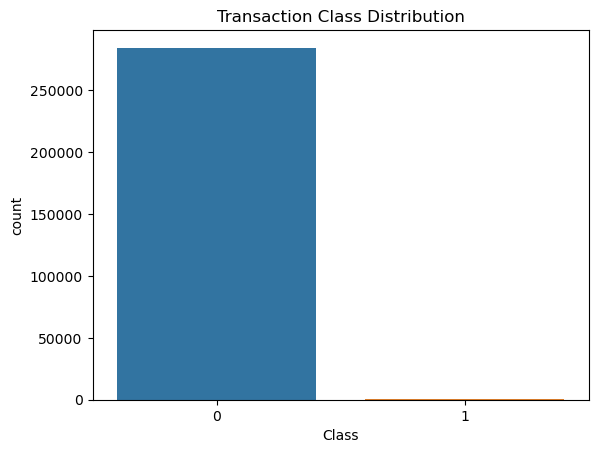

In [49]:
# Lets creates a count plot for the 'Class' column in the dataframe 'df'
sns.countplot(data = df, x = 'Class')
plt.title('Transaction Class Distribution');

Figure_1: We can See that, there is very less ratio of Fraud in dataset

In [50]:
# Lets See the Fraud and Normal dataste
Fraud = df[df['Class'] == 1]
Normal = df[df['Class']== 0]

print('Fraud: ',(Fraud.shape))
print('Normal:',(Normal.shape))

Fraud:  (492, 31)
Normal: (284315, 31)


In [51]:
# This line of code provides descriptive statistics of the 'Amount' column;
Fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [52]:
# This line of code provides descriptive statistics of the 'Amount' column;
Normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

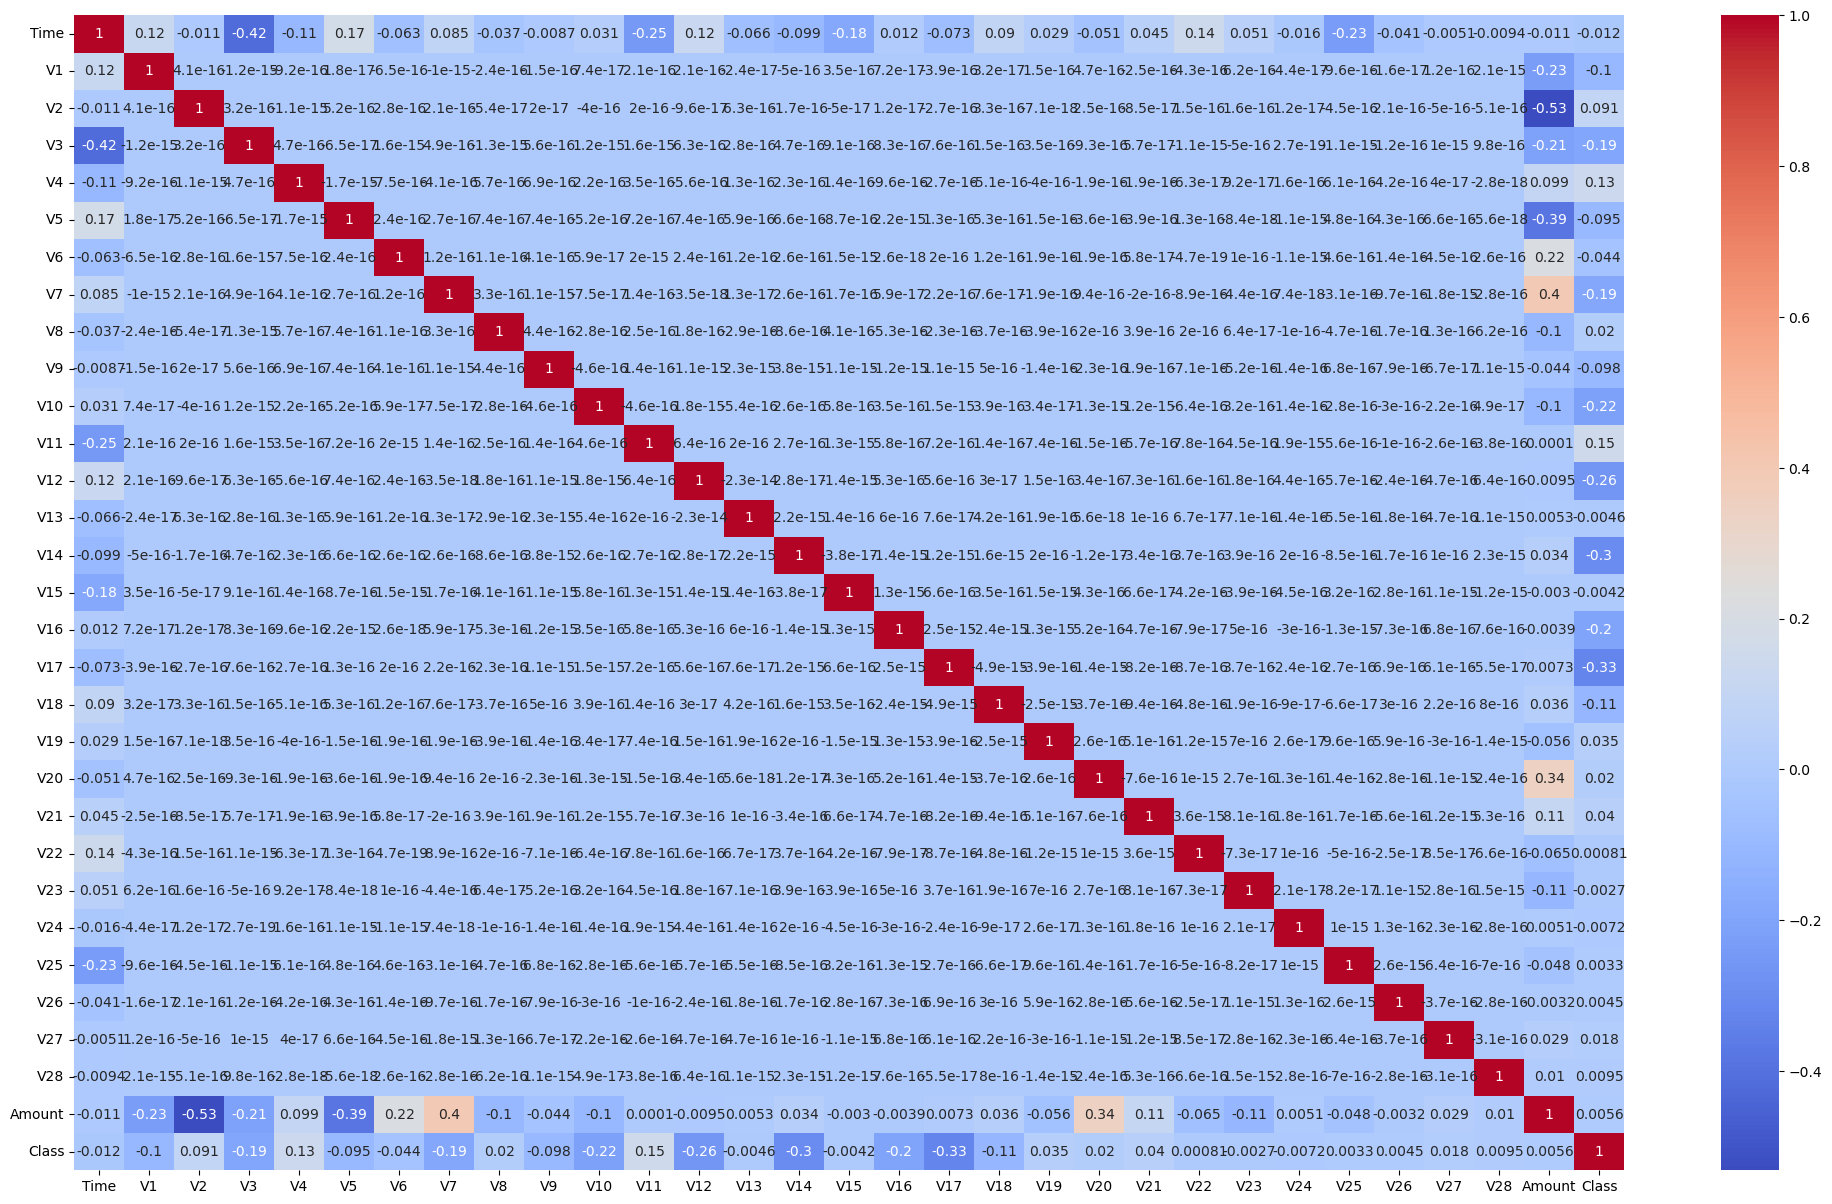

In [53]:
# Lets See the correlation of all features in the dataframe 'df'
corr = df.corr()
plt.figure(figsize = (25, 15))
sns.heatmap(corr, cmap="coolwarm", annot = True)
plt.show()

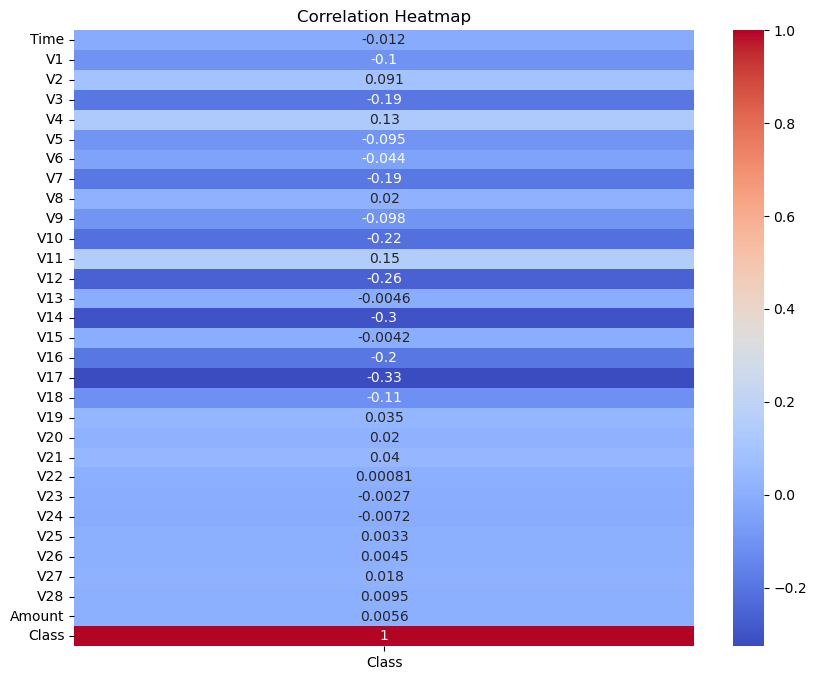

In [54]:
# Calculate the correlation of 'Class' with other features in the dataframe 'df'
corr = df.corr()['Class']
plt.figure(figsize=(10, 8))
sns.heatmap(corr.to_frame(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 7.0 Model Selection & Prediction

In [55]:
# Import necessary libraries from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

####  Create Independent and Dependent Variables

In [56]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df.drop(columns = ['Class'])
y = df['Class']

####  Train Test Split Data

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.2, random_state= 30)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


We don't need to normalize the data, because dataset is already normalized

### 7.1 Logistic Regression

####  Model Training & Performance

In [71]:
# Create logistic regression object with increased number of iterations
lr = LogisticRegression(max_iter=1000)
# Train the model using the training sets
lr.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [72]:
# Lets get prediction on training dataset
lr_pred = lr.predict(xtest)
# lets Predicting prabability of 0 and 1
pred_prb = lr.predict_proba(xtest)
# Lets Only predicting and extracting probability values of 1
lr_pred_prb = pred_prb[:, 1]

#### Comparison of Predicted and Actual

In [73]:
# Lets Create a copy of the 'xtest' DataFrame to 'xt'
xt = xtest.copy()
xt['pred_probability'] = lr_pred_prb
xt['lr_pred'] = lr_pred
xt['actual'] = ytest
xt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,pred_probability,lr_pred,actual
245610,152829.0,2.059980,-0.844971,-1.207683,-0.704862,-0.745547,-0.534809,-1.010118,0.045314,-0.085643,0.250257,1.015598,-0.478145,-0.458021,-1.798004,-0.229771,1.927809,1.098448,0.138873,0.537969,0.058251,0.283744,0.799541,0.042808,-0.508817,-0.181231,-0.082585,0.019243,-0.022223,44.00,3.950482e-05,0,0
280690,169687.0,-1.784634,0.634279,0.272226,-0.066718,-0.629629,-0.550614,0.026553,0.829429,-0.458780,-0.684933,0.233253,0.020999,-1.666843,1.169865,-0.356415,0.373678,-0.096208,0.568444,0.574291,-0.423181,0.157879,0.100319,-0.076642,0.073184,-0.161472,0.277890,-0.390407,-0.062382,74.95,7.119778e-07,0,0
44001,41743.0,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,4.354775,-2.872400,0.468875,-4.555667,0.699671,-2.901141,-4.674667,-2.213623,1.296165,0.668124,0.144653,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,802.52,2.403283e-01,0,1
412,297.0,1.145614,0.004148,0.772422,0.916543,-0.568699,-0.281603,-0.161752,-0.025480,0.479307,-0.290947,-0.118965,1.135894,0.734979,-0.329917,-0.245924,-0.764725,0.427097,-1.229510,-0.301616,-0.098173,-0.046280,0.174420,-0.014831,0.481153,0.460998,0.417277,0.007883,0.014894,12.31,1.939362e-02,0,0
194043,130419.0,2.223172,-0.796640,-1.273254,-1.292398,-0.150683,-0.077139,-0.641633,-0.070280,-0.544780,0.910774,0.022960,0.133148,0.877213,-0.136005,-0.379007,1.735855,-0.635779,-1.000722,1.554580,0.068006,-0.283441,-0.905845,0.292509,-1.433177,-0.388761,-0.625948,-0.016329,-0.065385,19.95,3.916731e-05,0,0


**Accuracy** ____ | ____ **Precision** _____ | ____  **Recall** ___ | ____ **F1_Score**


In [74]:
# Lets Check the accuracy, precision, recall and f1 score of model
print('accuracy_score: ',accuracy_score(lr_pred, ytest))
print('precision_score:',precision_score(lr_pred, ytest))
print('recall_score:   ',recall_score(lr_pred, ytest))
print('f1_score:       ',f1_score(lr_pred, ytest))

accuracy_score:  0.9990871107053826
precision_score: 0.6160714285714286
recall_score:    0.8846153846153846
f1_score:        0.7263157894736842


#### Confusion metrix

In [75]:
# Lets Check the confusion metrix score
confusion_matrix(ytest, lr_pred)

array([[56841,     9],
       [   43,    69]], dtype=int64)

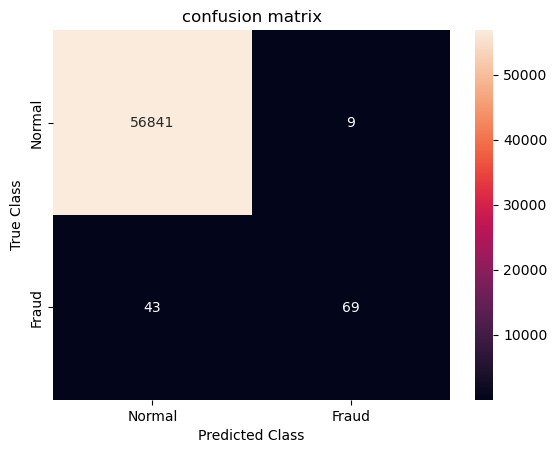

In [76]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, lr_pred)
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Classification Report

In [77]:
# Lets get report of precision recall and f1 score
print(classification_report(ytest, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.88      0.62      0.73       112

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### 7.2 RandomForest Classifier

In [78]:
# Lets Create RandomForest Classifier  
rf = RandomForestClassifier(max_depth=4, random_state=100)
# Train the model using the training sets
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=4, random_state=100)

In [28]:
# Lets get prediction on training dataset
rf_pred = rf.predict(xtest)
rf_pred_prb = rf.predict_proba(xtest)[:, 1]

# Lets Check the accuracy, precision, recall and f1 score of model
print('accuracy_score: ',accuracy_score(rf_pred, ytest))
print('precision_score:',precision_score(rf_pred, ytest))
print('recall_score:   ',recall_score(rf_pred, ytest))
print('f1_score:       ',f1_score(rf_pred, ytest))

accuracy_score:  0.9993679997191109
precision_score: 0.710691823899371
recall_score:    0.9338842975206612
f1_score:        0.8071428571428573


#### Confusion metrix

In [67]:
# Lets Check the confusion metrix score
confusion_matrix(ytest, lr_pred)

array([[85267,    17],
       [   61,    98]], dtype=int64)

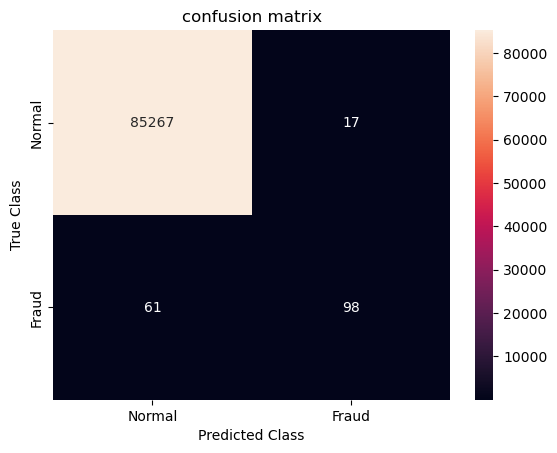

In [68]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, lr_pred)
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Classification Report

In [39]:
# Lets get report of precision recall and f1 score
print(classification_report(ytest, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.85      0.62      0.72       159

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

